In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# KNN

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [7]:
data_gender = pd.read_csv("gender_submission.csv", sep=",")
data_test = pd.read_csv("test.csv", sep=",")
data_train = pd.read_csv("train.csv", sep=",")


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [11]:
data_test.isna().sum() / data_test.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [14]:
data_train.isna().sum() / data_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [17]:
data_test = data_test.merge(data_gender, how = "left")

2. En base al resultado anterior. ¿Cúales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [20]:
data_test.drop(columns = "Cabin", inplace = True) 
data_train.drop(columns = "Cabin", inplace = True)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

<Axes: xlabel='Age', ylabel='Count'>

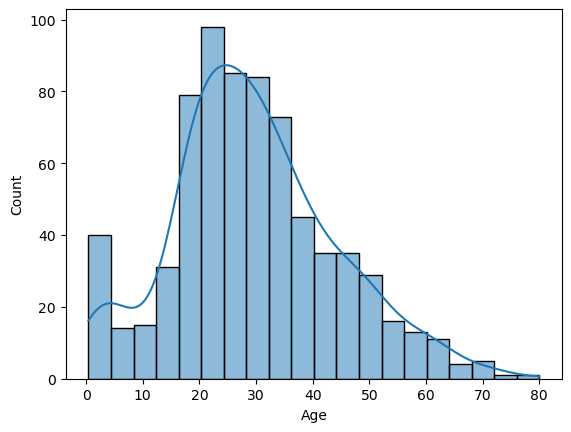

In [23]:
sns.histplot(data_train["Age"], kde = True)

In [26]:
print(data_train["Age"].median())
print(data_train["Age"].mean())

28.0
29.69911764705882


In [29]:
data_test.fillna({"Age":data_test["Age"].median()}, inplace=True)
data_train.fillna({"Age":data_train["Age"].median()}, inplace=True)

In [34]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
dtype: int64

In [38]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<Axes: xlabel='Embarked', ylabel='PassengerId'>

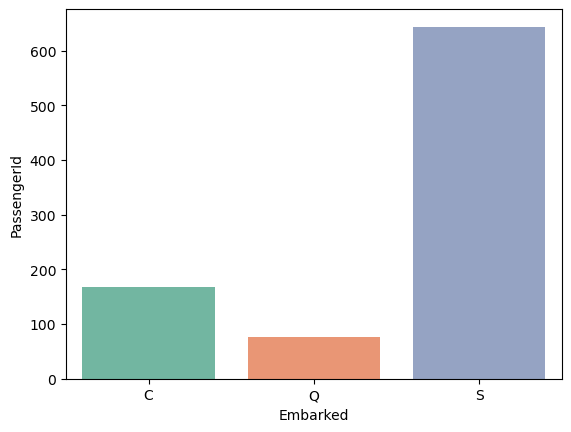

In [41]:
embarked = data_train.groupby("Embarked").agg({"PassengerId":"count"}).reset_index()
sns.barplot(x=embarked["Embarked"], y=embarked["PassengerId"], hue = embarked["Embarked"], palette='Set2')

In [45]:
data_train["Embarked"].fillna(
    data_train['Embarked'].value_counts().idxmax(), 
    inplace=True
)

C:\Users\arnau\AppData\Local\Temp\ipykernel_1580\2902772065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["Embarked"].fillna(


In [48]:
data_test.loc[data_test["Fare"].isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [51]:
promedio = data_test.loc[data_test["Pclass"] == 3,"Fare"].mean()

data_test["Fare"].fillna(
    promedio, 
    inplace=True
)

C:\Users\arnau\AppData\Local\Temp\ipykernel_1580\469068062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test["Fare"].fillna(


4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

<Axes: xlabel='Pclass', ylabel='PassengerId'>

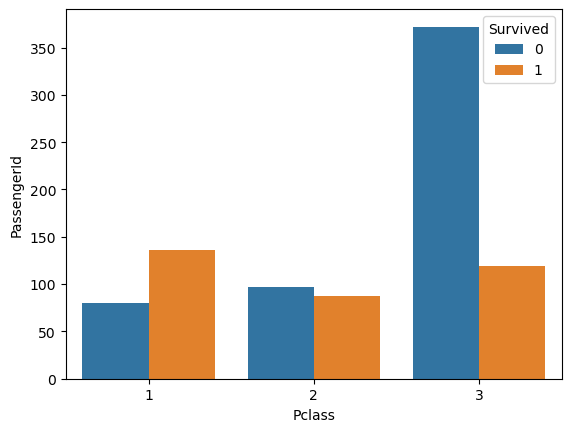

In [54]:
data_plot = data_train.groupby(["Pclass", "Survived"]).agg({"PassengerId":"count"}).reset_index()
sns.barplot(data = data_plot, x="Pclass", y="PassengerId", hue="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

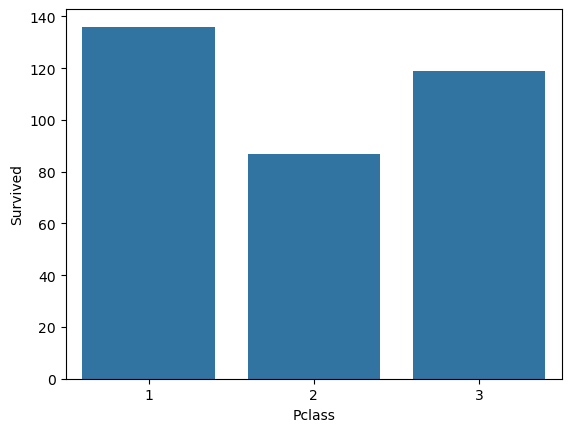

In [57]:
data_plot = data_train.groupby("Pclass").agg({"Survived":"sum"}).reset_index()
sns.barplot(x=data_plot["Pclass"], y=data_plot["Survived"])

<Axes: xlabel='Sex', ylabel='Survived'>

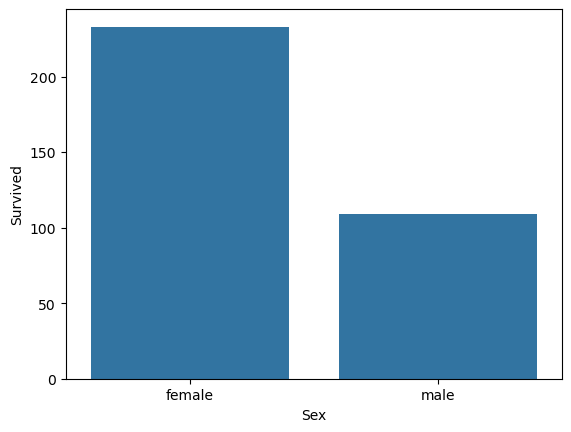

In [60]:
data_plot = data_train.groupby("Sex").agg({"Survived":"sum"}).reset_index()
sns.barplot(x=data_plot["Sex"], y=data_plot["Survived"])

(0.0, 200.0)

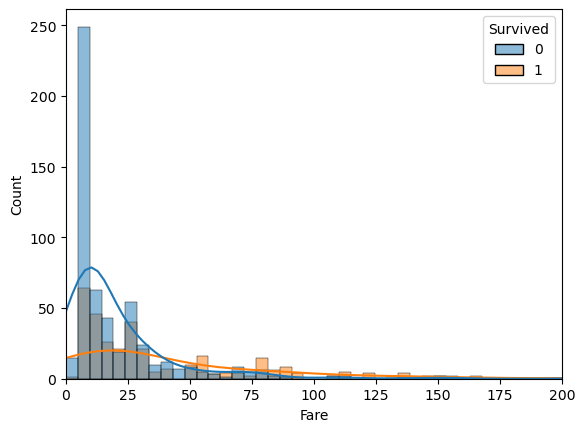

In [63]:
sns.histplot(x=data_train["Fare"], hue=data_train["Survived"],kde =True)
plt.xlim((0,200))

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [66]:
data_test = pd.get_dummies(
    data_test, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

data_train = pd.get_dummies(
    data_train, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

In [69]:
data_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,False,True,True,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,False,True,False,True,False
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,True,False,True,False,True
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,False,True,False,True,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,False,True,False,True,False


6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [72]:
data_train.drop('PassengerId', axis=1, inplace=True)
data_train.drop('Name', axis=1, inplace=True)
data_train.drop('Ticket', axis=1, inplace=True)

data_test.drop('PassengerId', axis=1, inplace=True)
data_test.drop('Name', axis=1, inplace=True)
data_test.drop('Ticket', axis=1, inplace=True)

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [ ]:
data_train['IsMinor']=np.where(data_train['Age']<=16, 1, 0)
data_test['IsMinor']=np.where(data_test['Age']<=16, 1, 0)

8. Ajustar modelo considerando todas las variables del dataset de testing.

In [94]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [96]:
acum = []
for i in range(1,11):
    model = KMeans(
        n_clusters=i, # número de centroides
        n_init = 10, # número de semillas diferentes que va a probar el algoritmo
        max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
    )
    model.fit(data_train)
    acum.append([i,model.inertia_])


C:\Users\arnau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\arnau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\arnau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\arnau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [99]:
acum

[[1, 2351442.705181183],
 [2, 1000247.4411524644],
 [3, 548523.0987089343],
 [4, 344893.16210473835],
 [5, 254189.28001294803],
 [6, 187293.6519164317],
 [7, 142549.67731801356],
 [8, 120939.1411207153],
 [9, 104806.77376108411],
 [10, 94409.72794423027]]

In [102]:
tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,1,2.351443e+06
1,2,1.000247e+06
2,3,5.485231e+05
3,4,3.448932e+05
4,5,2.541893e+05
5,6,1.872937e+05
6,7,1.425497e+05
7,8,1.209391e+05
8,9,1.048068e+05
9,10,9.440973e+04


<Axes: xlabel='clusters', ylabel='Error'>

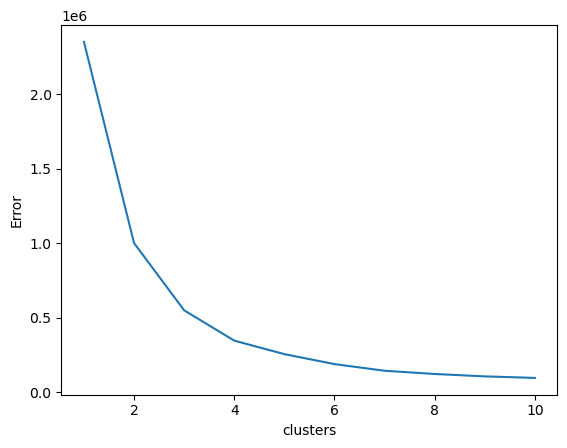

In [105]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

9. Validar el modelo con datos de training, agregar columna con cluster a data_train

In [108]:
model = KMeans(
    n_clusters=4, # número de centroides
    n_init = 10, # número de semillas diferentes que va a probar el algoritmo
    max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
)
model.fit(data_train)

C:\Users\arnau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [111]:
clusters_k_means = pd.Series(model.labels_)

In [116]:
data_train["clusters_k_means"] = clusters_k_means

In [123]:
data_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor,clusters_k_means
0,0,22.0,1,0,7.2500,False,True,False,True,True,0,1
1,1,38.0,1,0,71.2833,False,False,False,False,False,0,0
2,1,26.0,0,0,7.9250,False,True,False,True,False,0,1
3,1,35.0,1,0,53.1000,False,False,False,True,False,0,0
4,0,35.0,0,0,8.0500,False,True,False,True,True,0,1


<Axes: xlabel='None', ylabel='count'>

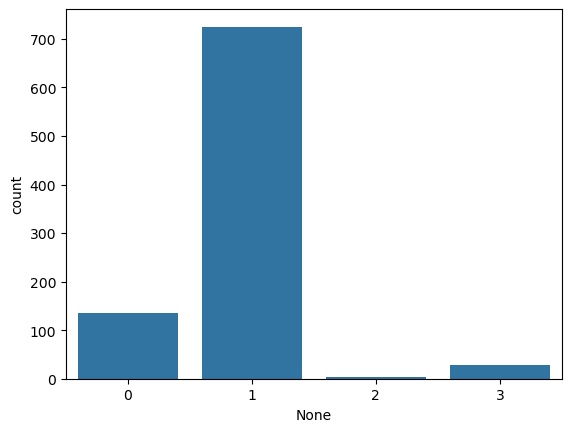

In [126]:
sns.countplot(x = clusters_k_means)

10. Calcular matriz de confusión

11. Calcular Accuracy

12. Calcular sensibilidad

13. Calcular especificidad